In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
# print(os.getcwd())
# os.chdir('../../')
# print(os.getcwd())

In [3]:
base_input_dir = "/data/tasnina/drug-synergy-prediction/inputs/train/"
base_output_dir = "/data/tasnina/drug-synergy-prediction/outputs/"

base_test_score_path = "/data/tasnina/drug-synergy-prediction/outputs/test_scores/"

In [4]:
# feature_types = ['only_MACCS','MACCS_Target']
feature_types = ['MACCS_Target']
model = 'SVM'

In [5]:
list_of_cell_lines = [ 'NCI-H226','HCC-2998', 'MDA-MB-435', 
 'DIPG25', 'COLO 205', 'HCT-15', 'HOP-92', 'TK-10', 'U251', 'HL-60(TB)', 'CCRF-CEM', 'EKVX', 
 'NCI-H522', 'SW-620','MALME-3M', 'RPMI-8226','NCI-H322M','UO-31','MDA-MB-231', 'SK-MEL-5','HS 578T',
 'M14', 'T-47D', 'SR', 'SF-539', 'OVCAR-8','OVCAR-5', 'SK-OV-3', 'OVCAR-4', 'TMD8',
 'HOP-62', 'NCIH23', 'IGROV1', 'ACHN', 'MCF7','SNB-19', '786-0', 'MDA-MB-468', 'K-562', 'SF-268', 'KBM-7', 
 'KM12', 'SF-295','A498', 'HCT116', 'OVCAR3', 'CAKI-1', 'BT-549', 'UACC62', 
 'A549','NCI-H460','SN12C', 'MOLT-4', 'SNB-75', 'HT29', 'RXF 393', 'LOX IMVI', 'UACC-257', 'SK-MEL-28', 'DU-145']

In [6]:
def plot_score(score_dict, score_type, kernel, cell_line, output_dir):
    x = list(score_dict.keys())
    y = list(score_dict.values())
    plt.plot(x, y)
    plt.xlabel('C')
    plt.ylabel(score_type)
    
    title = score_type + ' vs C for '+ kernel + ' kernel in '+ cell_line 
    plt.title(title)
#     plt.figure(figsize=[8, 6])
    
    file_name = output_dir + cell_line + '/' +  kernel + '_' + score_type + '_plot.pdf'
    
    plt.savefig(file_name, bbox_inches ="tight", format = 'pdf')
    print(file_name, ' saved')
    
    plt.show()
    plt.close()

In [7]:
def SVM_model(input_dir, output_dir, list_of_cell_lines ):
    scoring  = ['accuracy','precision','recall','f1', 'roc_auc']

    for cell_line in list_of_cell_lines:
        feature_file = input_dir+cell_line+'_features.tsv'
        label_file = input_dir+cell_line+'_labels.tsv'

        feature = pd.read_csv(feature_file,sep='\t').to_numpy()
        # print(feature, feature.shape)
        label = pd.read_csv(label_file,sep='\t')
        label['Loewe'] = label['Loewe'].apply(lambda x: 0 if x<0 else 1)
        label=label['Loewe'].to_numpy()
        # print(label, label.shape)

        X_train, X_test, y_train, y_test = train_test_split(
            feature, label, test_size=0.1, random_state=0)

        for k in ['linear', 'poly', 'rbf', 'sigmoid']:
            file_name = output_dir + cell_line + '/' +  k + '_.tsv'

            if(not os.path.exists(file_name)):
                os.makedirs(os.path.dirname(file_name), exist_ok=True)

                avg_accuracy_dict = {}
                avg_precision_dict = {}
                avg_recall_dict = {}
                avg_f1_dict = {}
                avg_roc_auc_dict = {}
                
                for c in range(1,100,5):
                    SVC_model = SVC(C=c, kernel = k, gamma='auto')
                    scores = cross_validate(SVC_model, X_train,y_train, cv=5, scoring = scoring)
                    avg_acc = np.average(scores['test_accuracy'])
                    avg_precision =  np.average(scores['test_precision'])
                    avg_recall =  np.average(scores['test_recall'])
                    avg_f1 =  np.average(scores['test_f1'])
                    avg_roc_auc =  np.average(scores['test_roc_auc'])
                    
                    avg_accuracy_dict[c] = avg_acc
                    avg_precision_dict[c] = avg_precision
                    avg_recall_dict[c] = avg_recall
                    avg_f1_dict[c] = avg_f1
                    avg_roc_auc_dict[c] = avg_roc_auc
                
                    print(avg_acc, avg_precision, avg_recall)
                #save these dictionary values as a df in file
                score_df = pd.concat([pd.Series(avg_accuracy_dict,name='accuracy'), \
                                     pd.Series(avg_precision_dict,name = 'precision'),\
                                     pd.Series(avg_recall_dict,name='recall'),\
                                     pd.Series(avg_f1_dict,name='f1'),\
                                     pd.Series(avg_roc_auc_dict,name='roc_Auc')\
                                     ],axis=1)


                score_df.to_csv(file_name, sep='\t')

            else:
                print(file_name + ' already exists')

            score_df = pd.read_csv(file_name, sep='\t', index_col = 'Unnamed: 0')
            
            for metric in score_df.columns:
                metric_dict = score_df[metric].to_dict()
                plot_score(metric_dict, metric, k, cell_line, output_dir)


/data/tasnina/drug-synergy-prediction/inputs/train//MACCS_Target/ /data/tasnina/drug-synergy-prediction/outputs//MACCS_Target/SVM/
0.7714595058374105 0.617182099634112 0.2598455598455599
0.7714595058374105 0.617182099634112 0.2598455598455599
0.7714595058374105 0.617182099634112 0.2598455598455599
0.7714595058374105 0.617182099634112 0.2598455598455599
0.7714595058374105 0.617182099634112 0.2598455598455599
0.7714595058374105 0.617182099634112 0.2598455598455599
0.7714595058374105 0.617182099634112 0.2598455598455599
0.7714595058374105 0.617182099634112 0.2598455598455599
0.7714595058374105 0.617182099634112 0.2598455598455599
0.7714595058374105 0.617182099634112 0.2598455598455599
0.7714595058374105 0.617182099634112 0.2598455598455599
0.7714595058374105 0.617182099634112 0.2598455598455599
0.7714595058374105 0.617182099634112 0.2598455598455599
0.7714595058374105 0.617182099634112 0.2598455598455599
0.7714595058374105 0.617182099634112 0.2598455598455599
0.7714595058374105 0.61718209

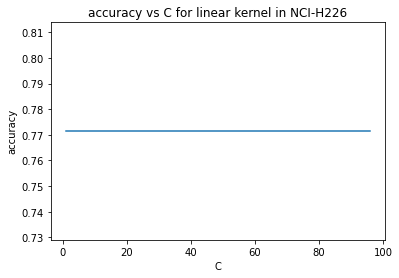

/data/tasnina/drug-synergy-prediction/outputs//MACCS_Target/SVM/NCI-H226/linear_precision_plot.pdf  saved


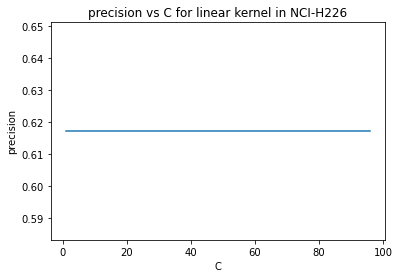

/data/tasnina/drug-synergy-prediction/outputs//MACCS_Target/SVM/NCI-H226/linear_recall_plot.pdf  saved


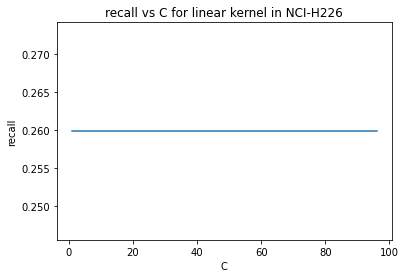

/data/tasnina/drug-synergy-prediction/outputs//MACCS_Target/SVM/NCI-H226/linear_f1_plot.pdf  saved


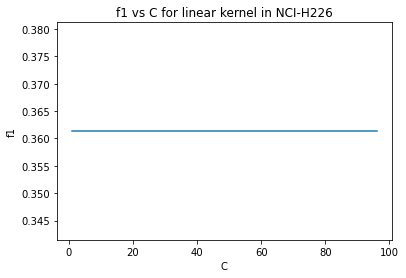

/data/tasnina/drug-synergy-prediction/outputs//MACCS_Target/SVM/NCI-H226/linear_roc_Auc_plot.pdf  saved


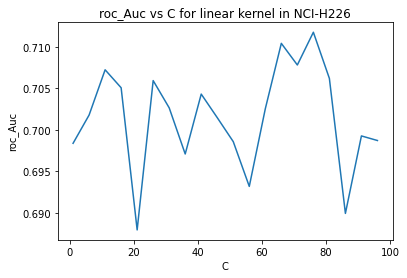

/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn

0.7479678865816164 0.0 0.0


/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn

0.7479678865816164 0.0 0.0


/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn

0.7479678865816164 0.0 0.0


/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn

0.7479678865816164 0.0 0.0


/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn

0.7479678865816164 0.0 0.0


/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn

0.7479678865816164 0.0 0.0


/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn

0.7479678865816164 0.0 0.0


/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn

0.7479678865816164 0.0 0.0


/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn

0.7479678865816164 0.0 0.0


/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn

0.7479678865816164 0.0 0.0


/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn

0.7479678865816164 0.0 0.0


/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn

0.7479678865816164 0.0 0.0


/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn

0.7479678865816164 0.0 0.0


/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn

0.7479678865816164 0.0 0.0


/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn

0.7479678865816164 0.0 0.0


/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn

0.7479678865816164 0.0 0.0


/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn

0.7479678865816164 0.0 0.0


/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn

0.7479678865816164 0.0 0.0


/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn

0.7479678865816164 0.0 0.0


/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn

0.7479678865816164 0.0 0.0
/data/tasnina/drug-synergy-prediction/outputs//MACCS_Target/SVM/NCI-H226/poly_accuracy_plot.pdf  saved


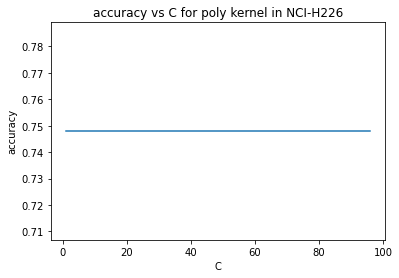

/data/tasnina/drug-synergy-prediction/outputs//MACCS_Target/SVM/NCI-H226/poly_precision_plot.pdf  saved


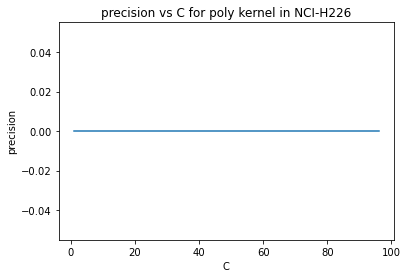

/data/tasnina/drug-synergy-prediction/outputs//MACCS_Target/SVM/NCI-H226/poly_recall_plot.pdf  saved


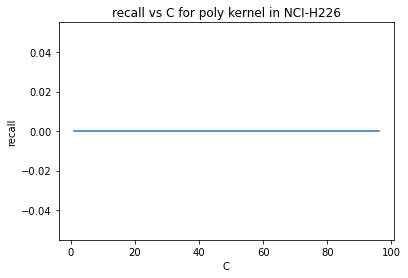

/data/tasnina/drug-synergy-prediction/outputs//MACCS_Target/SVM/NCI-H226/poly_f1_plot.pdf  saved


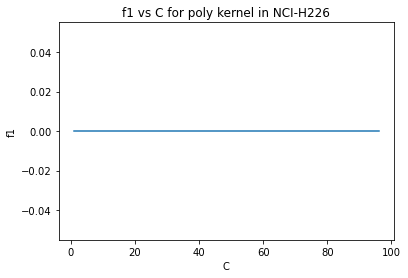

/data/tasnina/drug-synergy-prediction/outputs//MACCS_Target/SVM/NCI-H226/poly_roc_Auc_plot.pdf  saved


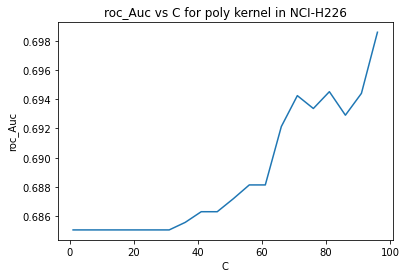

/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn

0.7479678865816164 0.0 0.0


/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tasnina/anaconda3/envs/sc/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7497747770752683 0.34285714285714286 0.01073037323037323
0.7601615885110773 0.8033116883116882 0.06451093951093952
0.7606140771988601 0.7670995670995671 0.07168597168597168
0.7646793254547869 0.7943233237350885 0.09136100386100385
0.7637763909175408 0.7543233237350885 0.09314671814671813
0.7642278581861638 0.7575912975912976 0.09493243243243243
0.7637763909175408 0.7335654051830522 0.11100386100386099
0.7615190545744257 0.6679638009049774 0.12175032175032174
0.7619705218430488 0.6699245852187029 0.12353603603603602
0.7624219891116717 0.6586877828054298 0.13433075933075933
0.766033727260656 0.67462715855573 0.1611325611325611
0.7669387046362216 0.6715162988272232 0.16832368082368082
0.7692001266559758 0.6503577242862957 0.19343629343629343
0.7692001266559758 0.6503577242862957 0.19343629343629343
0.7687486593873528 0.6481536426536426 0.19343629343629343
0.7692001266559757 0.6494658119658119 0.19879343629343632
0.7687486593873528 0.6459899116478065 0.20239703989703992
0.769651593924598

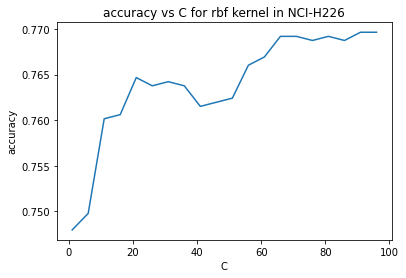

/data/tasnina/drug-synergy-prediction/outputs//MACCS_Target/SVM/NCI-H226/rbf_precision_plot.pdf  saved


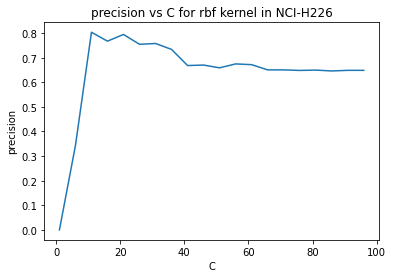

/data/tasnina/drug-synergy-prediction/outputs//MACCS_Target/SVM/NCI-H226/rbf_recall_plot.pdf  saved


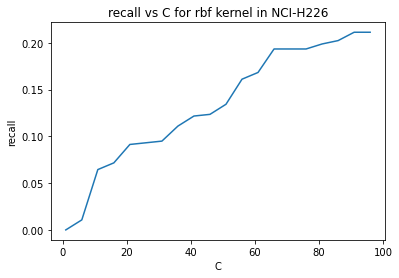

/data/tasnina/drug-synergy-prediction/outputs//MACCS_Target/SVM/NCI-H226/rbf_f1_plot.pdf  saved


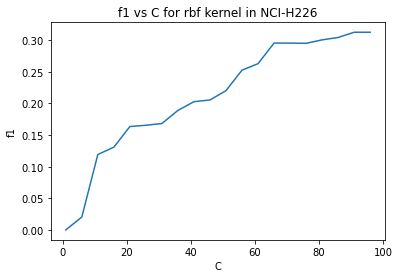

In [ ]:
for feature_combo in feature_types:
    input_dir = base_input_dir + '/' + feature_combo + '/'
    output_dir = base_output_dir + '/' + feature_combo + '/' + model +'/'
    
    print(input_dir, output_dir)
    SVM_model(input_dir, output_dir,list_of_cell_lines )

In [ ]:
def find_best_c_SVM(file_name, metric):
    #give such metrics for which the highest value => best model
    
    score_df = pd.read_csv(file_name, sep='\t', index_col = 'Unnamed: 0')

    avg_metric_dict = score_df[metric].to_dict()
    
    index_with_max_value_for_metric = max(avg_metric_dict, key=avg_metric_dict.get)
    
    max_metric_val =avg_metric_dict[index_with_max_value_for_metric]
        
    return index_with_max_value_for_metric,  max_metric_val

In [ ]:
def compute_test_score_SVM(input_dir, c, kernel):
    # compute the performance on test dataset
    feature_file = input_dir+cell_line+'_features.tsv'
    label_file = input_dir+cell_line+'_labels.tsv'

    feature = pd.read_csv(feature_file,sep='\t').to_numpy()
    label = pd.read_csv(label_file,sep='\t')
    label['Loewe'] = label['Loewe'].apply(lambda x: 0 if x<0 else 1)
    label=label['Loewe'].to_numpy()
    # print(label, label.shape)

    X_train, X_test, y_train, y_test = train_test_split(
        feature, label, test_size=0.1, random_state=0)

    SVC_model = SVC(C=c, kernel = kernel, gamma='auto').fit(X_train, y_train)
    
    y_pred = SVC_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    return accuracy, precision, recall, f1

In [ ]:
#for each cell line find out the best hyperparameter and train model using those. Then compute the 
#performance on test dataset

for feature_combo in feature_types:
    input_dir = base_input_dir + '/' + feature_combo + '/'
    output_dir = base_output_dir + '/' + feature_combo + '/' + model +'/'
    
    test_score_file =  base_test_score_path + '/' + model + '_'+ feature_combo+'_test_score.tsv'
    
    all_cell_line_test_score_df= {}
    
    for cell_line in list_of_cell_lines:
        try: 
            best_c = 0
            best_kernel = 'linear'
            max_accuracy = 0
            for k in ['poly', 'rbf', 'linear']:
                file_name = output_dir + cell_line + '/' +  k + '_.tsv'
                c, accuracy = find_best_c_SVM(file_name, 'accuracy')
                if(accuracy>max_accuracy):
                    max_accuracy=accuracy
                    best_kernel = k
                    best_c=c

            accuracy, precision, recall, f1 =  compute_test_score_SVM(input_dir, best_c,best_kernel )
            all_cell_line_test_score_df[cell_line] = {'c': best_c, 'kernel': best_kernel,\
                                                      'max_5_fold_accuracy': max_accuracy,\
                                                      'accuracy' : accuracy, 'precision' : precision,\
                                                      'recall' : recall, 'f1': f1}
            print(cell_line, all_cell_line_test_score_df[cell_line] )
        except:
            print('Cross-validation result not found for :' ,feature_combo, cell_line)

    df = pd.DataFrame.from_dict(all_cell_line_test_score_df, orient='index')
    
    os.makedirs(os.path.dirname(test_score_file), exist_ok=True)
    df.to_csv(test_score_file, sep = '\t')